# Challenge Deep Learning

L'objectif de ce challenge est de proposer une méthode de classification, basée sur des réseaux de neurones, permettant de classer des images issues de Google Quickdraw (https://quickdraw.withgoogle.com/data).
Le jeu de données proposé comprend 5 classes balancées, avec 15000 exemples d'apprentissage et 5000 exemples de validation : des paniers, des yeux, des lunettes, des lapins et des mains.

Vous pouvez utiliser tout algorithme qui vous semble pertinent (PMC, CNN,), en faisant varier les données d'entrée (normalisation, augmentation de données,...), les paramètres des réseaux considérés (fonction objectif, optimiseur, dropout, learning rate, taille des batchs...)

Bien sûr, pour valider votre travail, nous ferons tourner le code en local, sur la base originale que nous conservons, pour voir si les résultats que vous proposez sont reproductibles. 

Le compte-rendu sera effectué sur un notebook jupyter, dans lequel vous reporterez votre méthodologie en markdown, et vos codes en Python. Vous expliquerez votre démarche, justifierez vos choix, commenterez vos expérimentations et vos résultats.

La notation sera construite de la manière suivante : 
- 12 points sur le compte-rendu
- 8 points seront accordés sur un classement par le taux de reconnsaissance des objets de la base de test. Les binômes seront classés par taux de reconnaissance décroissant, les premiers ayant 8 points accordés, les autres binômes ayant une note suivant une décroissance linéaire.

Le notebook sera déposé sur la plateforme moodle du cours.

# Drive


In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/DeepLearning/Data_Train_Valid.zip /content/sample_data

In [3]:
!mkdir /content/sample_data/DeepLearning

In [4]:
!unzip /content/sample_data/Data_Train_Valid.zip -d /content/sample_data/DeepLearning

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/sample_data/DeepLearning/images/rabbit/rabbit_124616.png  
  inflating: /content/sample_data/DeepLearning/__MACOSX/images/rabbit/._rabbit_124616.png  
  inflating: /content/sample_data/DeepLearning/images/rabbit/rabbit_076144.png  
  inflating: /content/sample_data/DeepLearning/__MACOSX/images/rabbit/._rabbit_076144.png  
  inflating: /content/sample_data/DeepLearning/images/rabbit/rabbit_061438.png  
  inflating: /content/sample_data/DeepLearning/__MACOSX/images/rabbit/._rabbit_061438.png  
  inflating: /content/sample_data/DeepLearning/images/rabbit/rabbit_009790.png  
  inflating: /content/sample_data/DeepLearning/__MACOSX/images/rabbit/._rabbit_009790.png  
  inflating: /content/sample_data/DeepLearning/images/rabbit/rabbit_041930.png  
  inflating: /content/sample_data/DeepLearning/__MACOSX/images/rabbit/._rabbit_041930.png  
  inflating: /content/sample_data/DeepLearning/images/rab

## Imports

In [ ]:
import tensorflow
import tensorflow.keras as tk
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Dense, Activation,Lambda,Flatten,Dropout,LeakyReLU
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
from PIL import Image
import glob
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Ajouter les imports nécessaires

## Données

In [5]:
classes = ["basket","eye","binoculars","rabbit","hand"]
train = pd.read_csv('/content/sample_data/DeepLearning/train.csv')
valid = pd.read_csv('/content/sample_data/DeepLearning/valid.csv')

NameError: ignored

In [ ]:
#Test imports depuis QuickDraw
!cp /content/drive/MyDrive/DeepLearning/Imports/full_numpy_bitmap_binoculars.npy /content/sample_data
!cp /content/drive/MyDrive/DeepLearning/Imports/full_numpy_bitmap_basket.npy /content/sample_data
!cp /content/drive/MyDrive/DeepLearning/Imports/full_numpy_bitmap_eye.npy /content/sample_data
!cp /content/drive/MyDrive/DeepLearning/Imports/full_numpy_bitmap_rabbit.npy /content/sample_data
!cp /content/drive/MyDrive/DeepLearning/Imports/full_numpy_bitmap_hand.npy /content/sample_data

In [ ]:
#Test imports depuis QuickDraw

baskets = np.load('/content/sample_data/full_numpy_bitmap_basket.npy')
nbbaskets = len(baskets)
baskets = baskets.reshape((nbbaskets,28,28,1))
#baskets = baskets/255
basketslabels = np.full((nbbaskets,5), 0)
for i in range(nbbaskets):
  basketslabels[i] = [1,0,0,0,0]

eyes = np.load('/content/sample_data/full_numpy_bitmap_eye.npy')
nbeyes = len(eyes)
eyes = eyes.reshape((nbeyes,28,28,1))
#eyes = eyes/255
eyeslabels = np.full((nbeyes,5), 0)
for i in range(nbeyes):
  eyeslabels[i] = [0,1,0,0,0]

binoculars = np.load('/content/sample_data/full_numpy_bitmap_binoculars.npy')
nbbinoculars = len(binoculars)
binoculars = binoculars.reshape((nbbinoculars,28,28,1))
#binoculars = binoculars/255
binocularslabels = np.full((nbbinoculars,5), 0)
for i in range(nbbinoculars):
  binocularslabels[i] = [0,0,1,0,0]

rabbits = np.load('/content/sample_data/full_numpy_bitmap_rabbit.npy')
nbrabbits = len(rabbits)
rabbits = rabbits.reshape((nbrabbits,28,28,1))
#rabbits = rabbits/255
rabbitslabels = np.full((nbrabbits,5), 0)
for i in range(nbrabbits):
  rabbitslabels[i] = [0,0,0,1,0]

hands = np.load('/content/sample_data/full_numpy_bitmap_hand.npy')
nbhands = len(hands)
hands = hands.reshape((nbhands,28,28,1))
#hands = hands/255
handslabels = np.full((nbhands,5), 0)
for i in range(nbhands):
  handslabels[i] = [0,0,0,0,1]

images = np.concatenate((baskets, eyes, binoculars, rabbits, hands), axis=0)
labels = np.concatenate((basketslabels, eyeslabels, binocularslabels, rabbitslabels, handslabels), axis=0)

randomize = np.arange(len(images))
np.random.shuffle(randomize)
x_train = images[randomize]
y_train = labels[randomize]

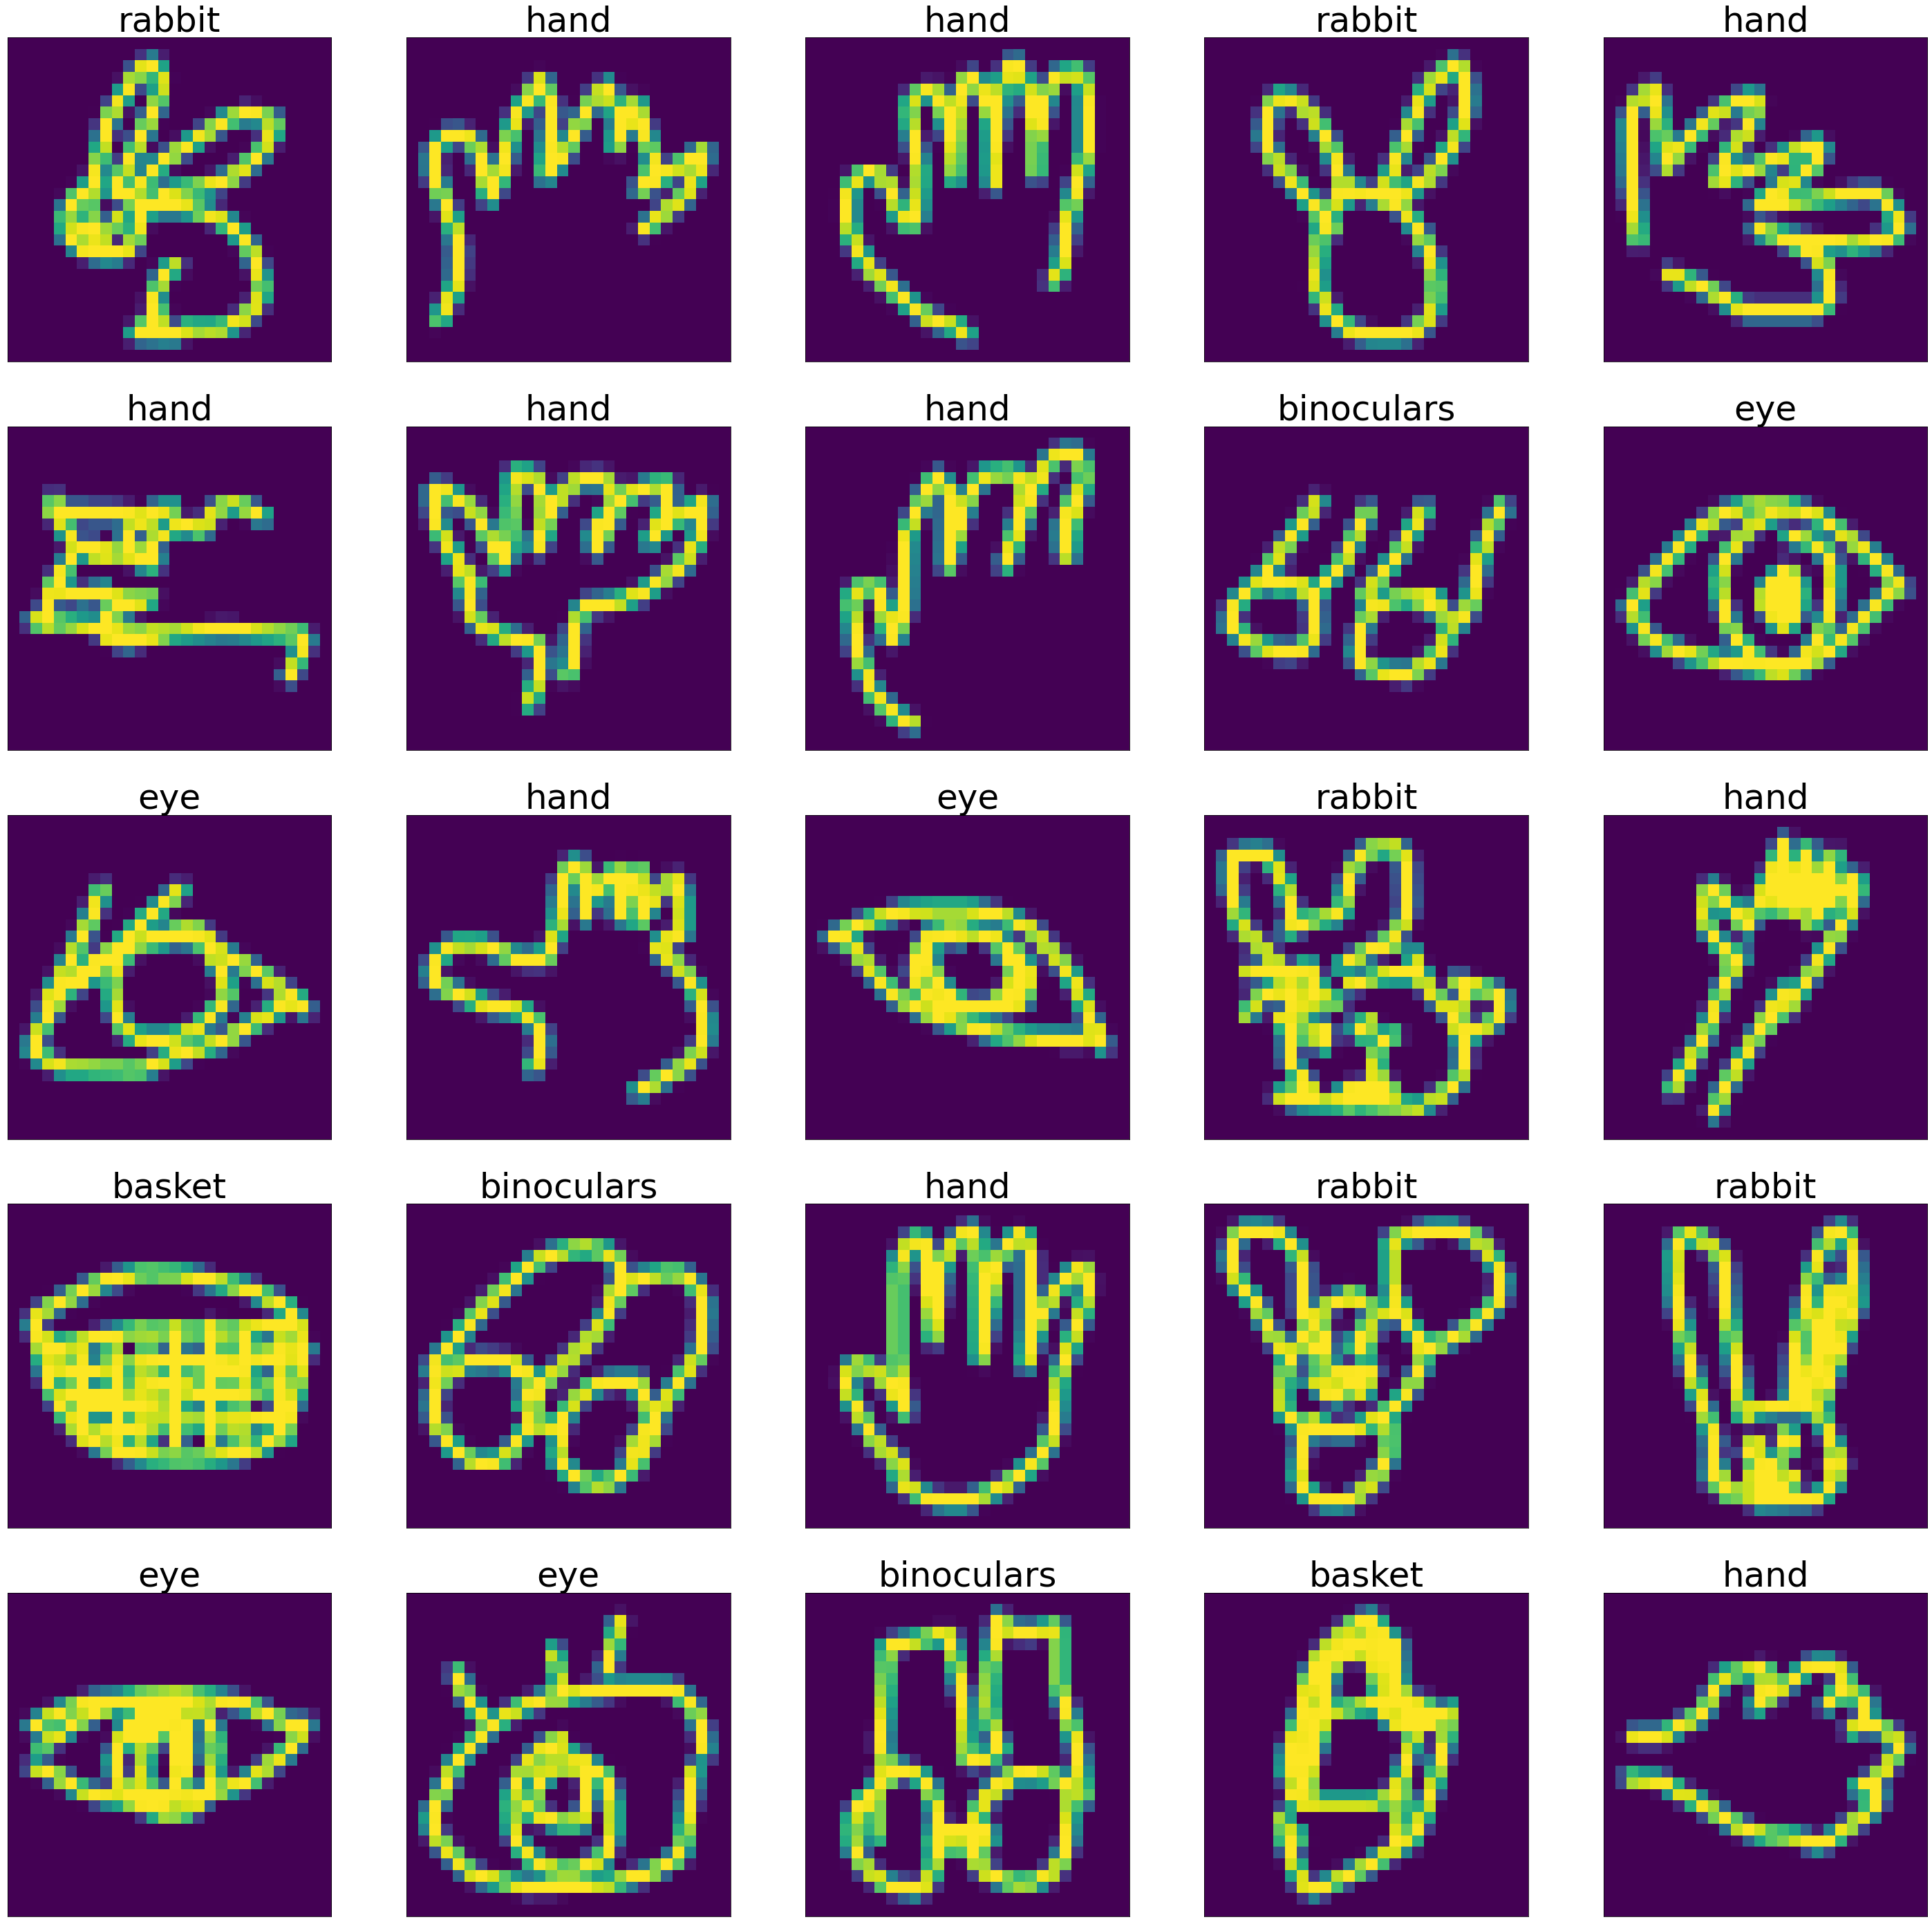

In [ ]:
#Test imports depuis QuickDraw
plt.figure(figsize=(50,50))
for i in range(25):
    ax= plt.subplot(5,5 ,i + 1)
    im = np.squeeze(x_train[i], axis=2)
    plt.title(classes[np.where(y_train[i] == 1)[0][0]], fontdict = {'fontsize' : 50})
    fig=ax.imshow(im)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
plt.show()    



In [ ]:
print(train)
#x_train = np.empty(shape=(len(train['relative_path']), 28, 28))
#y_train = np.empty(shape=(len(train['relative_path']), 5))
x_test = np.empty(shape=(len(valid['relative_path']), 28, 28))
y_test = np.empty(shape=(len(valid['relative_path']), 5))

#for i in range(len(train['relative_path'])):
  #print(train['relative_path'][i])
  #im = np.array(Image.open('/content/sample_data/DeepLearning/images/'+ train['relative_path'][i]))/255
  #x_train[i] = im;
  #for j in range(len(classes)):
  #  if j == train['class_label'][i]:
  #    y_train[i][j] = 1
  #  else:
  #    y_train[i][j] = 0
   
  #if(i % 1000 == 0):
  #  print((i/len(train['relative_path']))*100)

#x_train = np.expand_dims(x_train, axis=3)


for i in range(len(valid['relative_path'])):
  im = np.array(Image.open('/content/sample_data/DeepLearning/images/'+ valid['relative_path'][i])) #/255
  x_test[i] = im;
  for j in range(len(classes)):
    if j == valid['class_label'][i]:
      y_test[i][j] = 1
    else:
      y_test[i][j] = 0

  if(i % 1000 == 0):
    print((i/len(valid['relative_path']))*100)

x_test = np.expand_dims(x_test, axis=3)

              image_name             relative_path  class_label
0      basket_052681.png  basket/basket_052681.png            0
1      basket_028248.png  basket/basket_028248.png            0
2      basket_050738.png  basket/basket_050738.png            0
3      basket_034414.png  basket/basket_034414.png            0
4      basket_091738.png  basket/basket_091738.png            0
...                  ...                       ...          ...
74995    hand_241467.png      hand/hand_241467.png            4
74996    hand_052619.png      hand/hand_052619.png            4
74997    hand_168727.png      hand/hand_168727.png            4
74998    hand_285523.png      hand/hand_285523.png            4
74999    hand_263562.png      hand/hand_263562.png            4

[75000 rows x 3 columns]
0.0
4.0
8.0
12.0
16.0
20.0
24.0
28.000000000000004
32.0
36.0
40.0
44.0
48.0
52.0
56.00000000000001
60.0
64.0
68.0
72.0
76.0
80.0
84.0
88.0
92.0
96.0


In [ ]:
print(x_train[0])

In [ ]:
print(x_test[0])

In [ ]:
print(y_train)

In [ ]:
print(y_test)

### Test d'affichage des images chargées

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


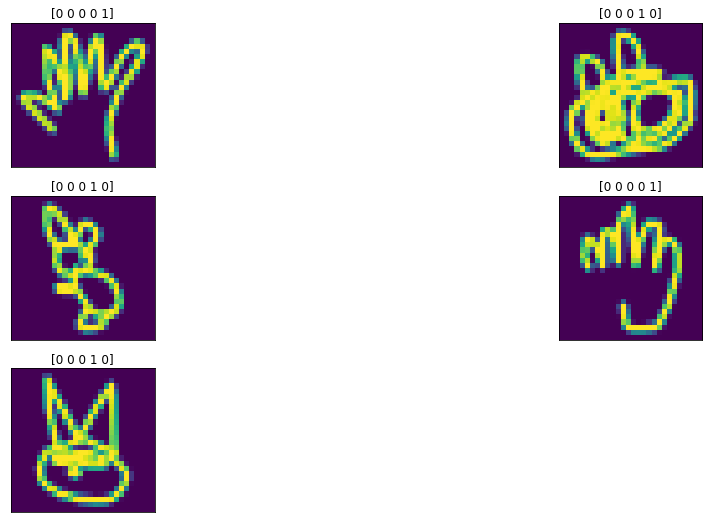

In [ ]:
plt.figure(figsize=(18,9))
for i in range(0,5):
    ax= plt.subplot(3,2 ,i + 1)
    im = np.squeeze(x_train[i], axis=2)
    fig=ax.imshow(im)
    plt.title(y_train[i])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
plt.show()    

FileNotFoundError: ignored

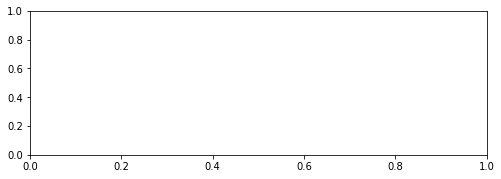

In [ ]:
plt.figure(figsize=(18,9))
for i in range(0,5):
    ax= plt.subplot(3,2 ,i+1)
    mydata = pd.read_csv("train.csv",skiprows = [1], nrows=1)
    im = Image.open('images/'+classes[i]+'/'+ os.listdir("images/"+classes[i])[0])
    fig=ax.imshow(im)
    plt.title(classes[i])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
plt.show()    


# Réseau convolutif entrainé à partir de rien

## Paramètres

In [ ]:
lr = 0.0005
num_epochs = 50
batch_size = 512
dropout = 0.75 # ici probabilité de garder le neurone

## Modèle

In [ ]:
model = Sequential([
  Conv2D(32,  input_shape=(28, 28, 1), kernel_size=(3,3), activation="relu", name="Conv1"),
  Conv2D(32, kernel_size=(3,3), activation="relu", name="Conv1b"),
  MaxPooling2D(pool_size=(2,2), name="MaxPool1"),    
  Conv2D(64, kernel_size=(3,3), activation="relu", name="Conv2"),
  Conv2D(64, kernel_size=(3,3), activation="relu", name="Conv2b"),
  MaxPooling2D(pool_size=(2,2), name="MaxPool2"),
  Flatten(name="Flatten"),
  Dropout(dropout, name="Dropout1"),
  Dense(1024, activation='relu', name="Dense1"),
  Dense(50, activation='relu', name="Dense2"),
  #Dropout(dropout, name="Dropout2"),
  Dense(5, activation="softmax", name="Classif")                  
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 26, 26, 32)        320       
                                                                 
 Conv1b (Conv2D)             (None, 24, 24, 32)        9248      
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 12, 12, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 10, 10, 64)        18496     
                                                                 
 Conv2b (Conv2D)             (None, 8, 8, 64)          36928     
                                                                 
 MaxPool2 (MaxPooling2D)     (None, 4, 4, 64)          0         
                                                                 
 Flatten (Flatten)           (None, 1024)              0

## Fonction de coût et optimisation

In [ ]:
optimizer = Adam(learning_rate=lr)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["acc"])

## Entraînement du réseau

In [ ]:
#Chargement d'un réseau entrainé précédemment
model.load_weights(filepath='/content/drive/MyDrive/DeepLearning/trained_models/dataset_complet/model.122-0.9807.h5') 

In [ ]:
saveCallback = tensorflow.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/DeepLearning/trained_models/dataset_complet_9807/model.{epoch:03d}-{val_acc:.4f}.h5')
hist = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=saveCallback, verbose=1)

Epoch 1/300
3186/3186 [==============================] - 80s 25ms/step - loss: 0.0343 - acc: 0.9666 - val_loss: 0.0299 - val_acc: 0.9710
Epoch 2/300
3186/3186 [==============================] - 80s 25ms/step - loss: 0.0329 - acc: 0.9681 - val_loss: 0.0294 - val_acc: 0.9720
Epoch 3/300
3186/3186 [==============================] - 82s 26ms/step - loss: 0.0323 - acc: 0.9687 - val_loss: 0.0298 - val_acc: 0.9718
Epoch 4/300
3186/3186 [==============================] - 82s 26ms/step - loss: 0.0311 - acc: 0.9697 - val_loss: 0.0275 - val_acc: 0.9728
Epoch 5/300
3186/3186 [==============================] - 80s 25ms/step - loss: 0.0308 - acc: 0.9698 - val_loss: 0.0273 - val_acc: 0.9735
Epoch 6/300
3186/3186 [==============================] - 81s 25ms/step - loss: 0.0302 - acc: 0.9705 - val_loss: 0.0280 - val_acc: 0.9731
Epoch 7/300
3186/3186 [==============================] - 80s 25ms/step - loss: 0.0300 - acc: 0.9706 - val_loss: 0.0270 - val_acc: 0.9738
Epoch 8/300
3186/3186 [==================

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Précision')
plt.ylabel('Précision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')

plt.subplot(1,2,2)
x = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.xlabel('epoch')
plt.ylabel('Entropie croisée')
plt.title("Test : Score = {0:5.3f}, Précision = {1:5.3f}".format(score[0], score[1]))
plt.plot(x,l)
plt.show()
plt.tight_layout()

Nombre d'erreurs 482/25000




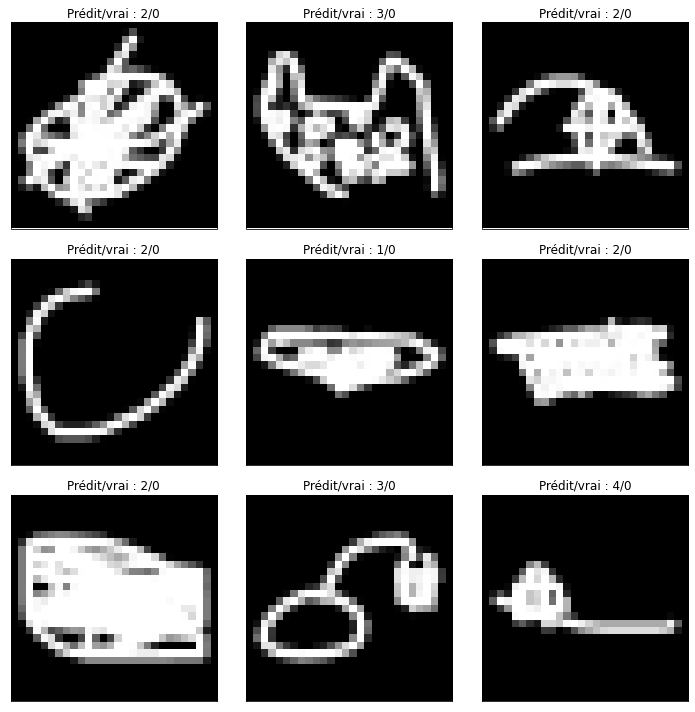

In [ ]:
predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y = np.argmax(y_test,axis=1)

incorrects = np.nonzero(predicted_classes != y)[0]
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrects[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Prédit/vrai : {}/{}".format(predicted_classes[incorrects[i]], y[incorrects[i]]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
print("Nombre d'erreurs {}/{}\n\n".format(incorrects.size,y.size))